<a href="https://colab.research.google.com/github/alessiapetracin/Machine-Learning-project---emotion-recognition/blob/main/PROJECT_part_A1_masked.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PART 1 A**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# IMPORT DATASETS AND CREATE NEW FOLDERS

input_data_folder = '/content/drive/MyDrive/RealLifeMask/Face-Mask'
output_train_folder = '/content/drive/MyDrive/RealLifeMask/output_train'
output_validation_folder = '/content/drive/MyDrive/RealLifeMask/output_val'

In [3]:
# CREATE TRAIN AND VALIDATION SPLITS

import os
import shutil
from sklearn.model_selection import train_test_split

# Create train and validation folders
os.makedirs(os.path.join(output_train_folder, '0'), exist_ok=True)
os.makedirs(os.path.join(output_train_folder, '1'), exist_ok=True)
os.makedirs(os.path.join(output_validation_folder, '0'), exist_ok=True)
os.makedirs(os.path.join(output_validation_folder, '1'), exist_ok=True)

# Organize data into 0 (unmasked) and 1 (masked) folders
unmasked_folder = os.path.join(input_data_folder, '0')
masked_folder = os.path.join(input_data_folder, '1')

# Get the list of image filenames for both classes
unmasked_images = os.listdir(unmasked_folder)
masked_images = os.listdir(masked_folder)

# Split data for both classes
unmasked_train, unmasked_val = train_test_split(unmasked_images, test_size=0.3, random_state=42)
masked_train, masked_val = train_test_split(masked_images, test_size=0.3, random_state=42)

# Move images to train and validation folders
for image in unmasked_train:
    src = os.path.join(unmasked_folder, image)
    dest = os.path.join(output_train_folder, '0', image)
    shutil.copy(src, dest)

for image in unmasked_val:
    src = os.path.join(unmasked_folder, image)
    dest = os.path.join(output_validation_folder, '0', image)
    shutil.copy(src, dest)

for image in masked_train:
    src = os.path.join(masked_folder, image)
    dest = os.path.join(output_train_folder, '1', image)
    shutil.copy(src, dest)

for image in masked_val:
    src = os.path.join(masked_folder, image)
    dest = os.path.join(output_validation_folder, '1', image)
    shutil.copy(src, dest)


In [12]:
# DATA PREPROCESSING

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths
train_data_folder = '/content/drive/MyDrive/RealLifeMask/output_train'
validation_data_folder = '/content/drive/MyDrive/RealLifeMask/output_val'

# Define image size and batch size
image_size = (128, 128)
batch_size = 32

# Create data generators for train and validation sets
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,          # Normalize pixel values to [0, 1]
    rotation_range=20,          # Randomly rotate images
    width_shift_range=0.2,      # Randomly shift images horizontally
    height_shift_range=0.2,     # Randomly shift images vertically
    horizontal_flip=True,       # Randomly flip images horizontally
    vertical_flip=False         # No vertical flip for face images
)

validation_datagen = ImageDataGenerator(rescale=1.0/255.0)  # Only rescale for validation

# Generate batches of augmented image data
train_generator = train_datagen.flow_from_directory(
    train_data_folder,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'  # Since it's a binary classification task
)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_folder,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)


Found 2763 images belonging to 2 classes.
Found 1186 images belonging to 2 classes.


In [5]:
# DEFINE MODEL 1

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [7]:
# TRAIN MODEL 1

from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,  # Adjust as needed
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[early_stopping]
)


Epoch 1/10
87/87 [==============================] - 32s 237ms/step - loss: 0.2854 - accuracy: 0.8925 - val_loss: 0.1424 - val_accuracy: 0.9604
Epoch 2/10
87/87 [==============================] - 22s 252ms/step - loss: 0.1571 - accuracy: 0.9432 - val_loss: 0.1388 - val_accuracy: 0.9410
Epoch 3/10
87/87 [==============================] - 21s 247ms/step - loss: 0.1499 - accuracy: 0.9410 - val_loss: 0.1196 - val_accuracy: 0.9595
Epoch 4/10
87/87 [==============================] - 23s 266ms/step - loss: 0.1401 - accuracy: 0.9457 - val_loss: 0.1123 - val_accuracy: 0.9646
Epoch 5/10
87/87 [==============================] - 20s 230ms/step - loss: 0.1373 - accuracy: 0.9533 - val_loss: 0.1171 - val_accuracy: 0.9637
Epoch 6/10
87/87 [==============================] - 21s 247ms/step - loss: 0.1339 - accuracy: 0.9533 - val_loss: 0.1007 - val_accuracy: 0.9629
Epoch 7/10
87/87 [==============================] - 20s 230ms/step - loss: 0.1252 - accuracy: 0.9522 - val_loss: 0.1073 - val_accuracy: 0.9629

In [8]:
# EVALUATE MODEL 1
evaluation = model.evaluate(validation_generator)

# Print results
print("Validation Loss:", evaluation[0])
print("Validation Accuracy:", evaluation[1])


38/38 [==============================] - 3s 66ms/step - loss: 0.1131 - accuracy: 0.9587
Validation Loss: 0.11313678324222565
Validation Accuracy: 0.9586846828460693


In [3]:
# DEFINE MODEL 2

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Define the CNN model
model2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Conv2D(512, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [6]:
# TRAIN MODEL 2
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model2.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,  # Adjust as needed
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[early_stopping]
)

Epoch 1/10
87/87 [==============================] - 439s 5s/step - loss: 0.5330 - accuracy: 0.8874 - val_loss: 0.4846 - val_accuracy: 0.8153
Epoch 2/10
87/87 [==============================] - 145s 2s/step - loss: 0.2117 - accuracy: 0.9341 - val_loss: 0.3024 - val_accuracy: 0.8406
Epoch 3/10
87/87 [==============================] - 113s 1s/step - loss: 0.1775 - accuracy: 0.9403 - val_loss: 0.2950 - val_accuracy: 0.8533
Epoch 4/10
87/87 [==============================] - 116s 1s/step - loss: 0.1445 - accuracy: 0.9446 - val_loss: 0.3007 - val_accuracy: 0.8465
Epoch 5/10
87/87 [==============================] - 117s 1s/step - loss: 0.1311 - accuracy: 0.9522 - val_loss: 0.1906 - val_accuracy: 0.9005
Epoch 6/10
87/87 [==============================] - 114s 1s/step - loss: 0.1500 - accuracy: 0.9399 - val_loss: 0.1881 - val_accuracy: 0.9393
Epoch 7/10
87/87 [==============================] - 124s 1s/step - loss: 0.1566 - accuracy: 0.9577 - val_loss: 0.6419 - val_accuracy: 0.9309
Epoch 8/10
87

In [7]:
# EVALUATE MODEL 2

evaluation = model2.evaluate(validation_generator)
evaluation_train = model2.evaluate(train_generator)

# Print results
print("Validation Loss:", evaluation[0])
print("Validation Accuracy:", evaluation[1])

print('Tranining Loss:', evaluation_train[0])
print('Training Accuracy:', evaluation_train[1])

87/87 [==============================] - 35s 404ms/step - loss: 0.1949 - accuracy: 0.9359
Validation Loss: 0.188068687915802
Validation Accuracy: 0.9392917156219482
Tranining Loss: 0.194924995303154
Training Accuracy: 0.9359391927719116


In [8]:
# SAVE MODEL 2

model2.save('training/model2.h5')

Model 2 had worse results because it was overfitting the training set, therefore early stopping was inserted, with patience = 3.

**PART 1 B**

In [18]:
# IMPORT PRETRAINED MODEL (VGG16) AND FINE-TUNE IT

from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Load the pre-trained VGG16 model (without top layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Add custom top layers for binary classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create the fine-tuned model
model3 = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
optimizer = Adam(learning_rate=0.0001)  # Adjust learning rate as needed
model3.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model3.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[early_stopping]
)


58889256/58889256 [==============================] - 3s 0us/step
Epoch 1/10
87/87 [==============================] - 42s 350ms/step - loss: 0.2826 - accuracy: 0.8664 - val_loss: 0.1808 - val_accuracy: 0.9174
Epoch 2/10
87/87 [==============================] - 25s 283ms/step - loss: 0.1507 - accuracy: 0.9425 - val_loss: 0.0992 - val_accuracy: 0.9629
Epoch 3/10
87/87 [==============================] - 24s 279ms/step - loss: 0.1105 - accuracy: 0.9591 - val_loss: 0.0911 - val_accuracy: 0.9671
Epoch 4/10
87/87 [==============================] - 24s 280ms/step - loss: 0.0891 - accuracy: 0.9653 - val_loss: 0.0906 - val_accuracy: 0.9654
Epoch 5/10
87/87 [==============================] - 23s 265ms/step - loss: 0.0772 - accuracy: 0.9729 - val_loss: 0.0683 - val_accuracy: 0.9789
Epoch 6/10
87/87 [==============================] - 23s 263ms/step - loss: 0.0744 - accuracy: 0.9743 - val_loss: 0.0870 - val_accuracy: 0.9654
Epoch 7/10
87/87 [==============================] - 24s 275ms/step - loss: 0.

In [19]:
# EVALUATE MODEL 3

# Evaluate the fine-tuned model on the validation set
evaluation = model3.evaluate(validation_generator)

# Print fine-tuned model results
print("Fine-tuned Model - Validation Loss:", evaluation[0])
print("Fine-tuned Model - Validation Accuracy:", evaluation[1])

38/38 [==============================] - 3s 69ms/step - loss: 0.0683 - accuracy: 0.9789
Fine-tuned Model - Validation Loss: 0.0682605430483818
Fine-tuned Model - Validation Accuracy: 0.9789207577705383


In [20]:
# IMPORT PRETRAINED MODEL (EFFICIENTNETV2L) AND FINE-TUNE IT

from tensorflow.keras.applications import EfficientNetV2L
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Load the pre-trained EfficientNetV2L model (without top layers)
base_model = EfficientNetV2L(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Add custom top layers for binary classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create the fine-tuned model
model4 = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
optimizer = Adam(learning_rate=0.0001)  # Adjust learning rate as needed
model4.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model4.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[early_stopping]
)


473176280/473176280 [==============================] - 22s 0us/step
Epoch 1/10
87/87 [==============================] - 271s 761ms/step - loss: 0.2776 - accuracy: 0.8617 - val_loss: 0.1059 - val_accuracy: 0.9528
Epoch 2/10
87/87 [==============================] - 56s 646ms/step - loss: 0.1073 - accuracy: 0.9609 - val_loss: 0.0798 - val_accuracy: 0.9680
Epoch 3/10
87/87 [==============================] - 55s 635ms/step - loss: 0.0740 - accuracy: 0.9772 - val_loss: 0.1137 - val_accuracy: 0.9578
Epoch 4/10
87/87 [==============================] - 56s 639ms/step - loss: 0.0639 - accuracy: 0.9797 - val_loss: 0.1093 - val_accuracy: 0.9587
Epoch 5/10
87/87 [==============================] - 56s 640ms/step - loss: 0.0571 - accuracy: 0.9786 - val_loss: 0.0503 - val_accuracy: 0.9806
Epoch 6/10
87/87 [==============================] - 60s 686ms/step - loss: 0.0421 - accuracy: 0.9852 - val_loss: 0.0640 - val_accuracy: 0.9781
Epoch 7/10
87/87 [==============================] - 56s 638ms/step - loss

In [21]:
# EVALUATE MODEL 4

# Evaluate the fine-tuned model on the validation set
evaluation = model4.evaluate(validation_generator)

# Print fine-tuned model results
print("Fine-tuned Model - Validation Loss:", evaluation[0])
print("Fine-tuned Model - Validation Accuracy:", evaluation[1])

38/38 [==============================] - 6s 156ms/step - loss: 0.0503 - accuracy: 0.9806
Fine-tuned Model - Validation Loss: 0.05032174661755562
Fine-tuned Model - Validation Accuracy: 0.9806070923805237


In [13]:
# IMPORT PRETRAINED MODEL (DENSENET121) AND FINE-TUNE IT

from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Load the pre-trained DenseNet121 model (without top layers)
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Add custom top layers for binary classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create the fine-tuned model
model5 = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
optimizer = Adam(learning_rate=0.0001)  # Adjust learning rate as needed
model5.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model5.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[early_stopping]
)


29084464/29084464 [==============================] - 0s 0us/step
Epoch 1/10
87/87 [==============================] - 510s 6s/step - loss: 0.2359 - accuracy: 0.9070 - val_loss: 0.1722 - val_accuracy: 0.9081
Epoch 2/10
87/87 [==============================] - 472s 5s/step - loss: 0.0692 - accuracy: 0.9703 - val_loss: 0.0766 - val_accuracy: 0.9747
Epoch 3/10
87/87 [==============================] - 476s 5s/step - loss: 0.0360 - accuracy: 0.9877 - val_loss: 0.0609 - val_accuracy: 0.9764
Epoch 4/10
87/87 [==============================] - 475s 5s/step - loss: 0.0384 - accuracy: 0.9852 - val_loss: 0.0576 - val_accuracy: 0.9789
Epoch 5/10
87/87 [==============================] - 480s 6s/step - loss: 0.0360 - accuracy: 0.9862 - val_loss: 0.0449 - val_accuracy: 0.9831
Epoch 6/10
87/87 [==============================] - 474s 5s/step - loss: 0.0269 - accuracy: 0.9899 - val_loss: 0.0394 - val_accuracy: 0.9882
Epoch 7/10
87/87 [==============================] - 474s 5s/step - loss: 0.0209 - accurac

In [14]:
# EVALUATE MODEL 5

# Evaluate the fine-tuned model on the validation set
evaluation = model5.evaluate(validation_generator)

# Print fine-tuned model results
print("Fine-tuned Model - Validation Loss:", evaluation[0])
print("Fine-tuned Model - Validation Accuracy:", evaluation[1])

38/38 [==============================] - 38s 1s/step - loss: 0.0394 - accuracy: 0.9882
Fine-tuned Model - Validation Loss: 0.03943205252289772
Fine-tuned Model - Validation Accuracy: 0.9881955981254578


In [15]:
# SAVE MODEL 5

model5.save('training/model5.h5')

**PART 2 - MASKED IMAGES**

In [7]:
import os
import json
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tqdm import tqdm
from PIL import Image

# Path to the FER_masked_Unmasked dataset
dataset_root = '/content/drive/MyDrive/FER_masked_Unmasked'

# Define target directory for preprocessed images
preprocessed_dir = '/content/drive/MyDrive/Preprocessed_Masked_Images'

image_size = (128, 128)
emotion_labels = ['positive', 'negative']

# Initialize lists to store data and labels for training and validation
train_masked_images = []
train_masked_labels = []
val_masked_images = []
val_masked_labels = []

# Loop through masked subfolders
for subfolder in os.listdir(os.path.join(dataset_root, 'AFEW-VA_masked')):
    subfolder_path = os.path.join(dataset_root, 'AFEW-VA_masked', subfolder)
    for image_folder in tqdm(os.listdir(subfolder_path), desc=f"Processing {subfolder}"):
        image_folder_path = os.path.join(subfolder_path, image_folder)
        json_path = os.path.join(image_folder_path, f"{image_folder}.json")

        # Load arousal and valence values from JSON
        with open(json_path, 'r') as json_file:
            label_data = json.load(json_file)
            json_part = list(list(label_data.values())[1].items())

            for k, i in json_part:
                image_name = k
                arousal = list(i.values())[0]
                valence = list(i.values())[2]

                # Determine emotion label based on valence
                if valence > 0:
                    emotion_label = 'positive'
                else:
                    emotion_label = 'negative'

                # Load and preprocess image
                image_path = os.path.join(image_folder_path, image_name + '.png')

                try:
                    image = load_img(image_path, target_size=image_size)
                    image_array = img_to_array(image) / 255.0  # Normalize pixel values to [0, 1]
                except FileNotFoundError:
                    # Skip this image if it's not found
                    continue


                # Determine if it's a training or validation image
                if 'train' in image_name:
                  train_masked_images.append(image_array)
                  train_masked_labels.append(emotion_labels.index(emotion_label))
                elif 'val' in image_name:
                  val_masked_images.append(image_array)
                  val_masked_labels.append(emotion_labels.index(emotion_label))

print("Preprocessing and saving complete.")


Processing 09: 100%|██████████| 45/45 [02:48<00:00,  3.75s/it]

Preprocessing and saving complete.


In [10]:
# AUGMENT TRAINING SET

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Convert lists to numpy arrays
train_masked_images = np.array(train_masked_images)
train_masked_labels = np.array(train_masked_labels)
val_masked_images = np.array(val_masked_images)
val_masked_labels = np.array(val_masked_labels)

# Create an ImageDataGenerator for data augmentation on the training set
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Data augmentation for validation images (only rescaling)
val_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Prepare the generators for training and validation
batch_size = 32

train_generator = train_datagen.flow(
    train_masked_images, train_masked_labels,
    batch_size=batch_size, shuffle=True
)

validation_generator = val_datagen.flow(
    val_masked_images, val_masked_labels,
    batch_size=batch_size, shuffle=False
)


Epoch 1/10
219/219 [==============================] - 265s 1s/step - loss: 0.7519 - accuracy: 0.6143 - val_loss: 0.6274 - val_accuracy: 0.6453
Epoch 2/10
219/219 [==============================] - 264s 1s/step - loss: 0.6257 - accuracy: 0.6311 - val_loss: 0.6113 - val_accuracy: 0.6376
Epoch 3/10
219/219 [==============================] - 267s 1s/step - loss: 0.6085 - accuracy: 0.6303 - val_loss: 0.6359 - val_accuracy: 0.5992
Epoch 4/10
219/219 [==============================] - 257s 1s/step - loss: 0.5982 - accuracy: 0.6407 - val_loss: 0.6538 - val_accuracy: 0.6351
Epoch 5/10
219/219 [==============================] - 255s 1s/step - loss: 0.5827 - accuracy: 0.6579 - val_loss: 0.5825 - val_accuracy: 0.6799
Epoch 6/10
219/219 [==============================] - 257s 1s/step - loss: 0.5708 - accuracy: 0.6646 - val_loss: 0.6649 - val_accuracy: 0.6095
Epoch 7/10
219/219 [==============================] - 255s 1s/step - loss: 0.5613 - accuracy: 0.6758 - val_loss: 0.5556 - val_accuracy: 0.6940

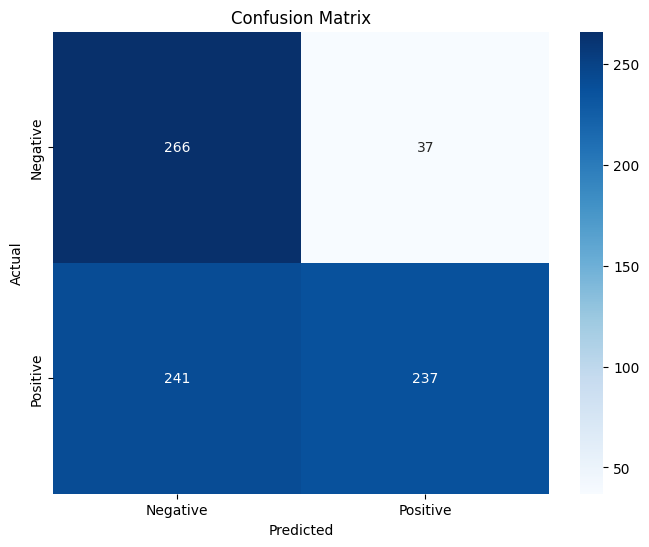

In [11]:
# MODEL 2 - MASKED IMAGES

from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score


# Load the pretrained model from the saved path
pretrained_model_path = 'training/model2.h5'
pretrained_model = load_model(pretrained_model_path)

# Compile the model
pretrained_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train with early stopping
pretrained_model.fit(
    train_datagen.flow(train_masked_images, train_masked_labels, batch_size=batch_size),
    steps_per_epoch=len(train_masked_images) // batch_size,
    epochs=10,
    validation_data=(val_masked_images, val_masked_labels),
    callbacks=[early_stopping]  # Add the early stopping callback
)

# Evaluate the model on the validation data
val_masked_predictions = pretrained_model.predict(val_masked_images)
val_masked_predicted_labels = (val_masked_predictions > 0.5).astype(int)  # Convert probabilities to binary labels
val_masked_accuracy = accuracy_score(val_masked_labels, val_masked_predicted_labels)
print("Validation Masked Accuracy:", val_masked_accuracy)

# Calculate the confusion matrix
confusion = confusion_matrix(val_masked_labels, val_masked_predicted_labels)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [28]:
# Print class distribution of validation data
print("Validation Class Distribution:")
print("Negative:", np.sum(val_masked_labels == 0))
print("Positive:", np.sum(val_masked_labels == 1))


Validation Class Distribution:
Negative: 303
Positive: 478


Epoch 1/10
219/219 [==============================] - 121s 236ms/step - loss: 0.5778 - accuracy: 0.7301 - val_loss: 1.4901 - val_accuracy: 0.6095
Epoch 2/10
219/219 [==============================] - 48s 218ms/step - loss: 0.3702 - accuracy: 0.8478 - val_loss: 1.0249 - val_accuracy: 0.8015
Epoch 3/10
219/219 [==============================] - 46s 212ms/step - loss: 0.2769 - accuracy: 0.8902 - val_loss: 0.2756 - val_accuracy: 0.9040
Epoch 4/10
219/219 [==============================] - 47s 215ms/step - loss: 0.2243 - accuracy: 0.9110 - val_loss: 0.1677 - val_accuracy: 0.9385
Epoch 5/10
219/219 [==============================] - 49s 224ms/step - loss: 0.1884 - accuracy: 0.9312 - val_loss: 0.3210 - val_accuracy: 0.8796
Epoch 6/10
219/219 [==============================] - 47s 216ms/step - loss: 0.1585 - accuracy: 0.9398 - val_loss: 0.0948 - val_accuracy: 0.9641
Epoch 7/10
219/219 [==============================] - 46s 211ms/step - loss: 0.1426 - accuracy: 0.9495 - val_loss: 0.1939 - val_a

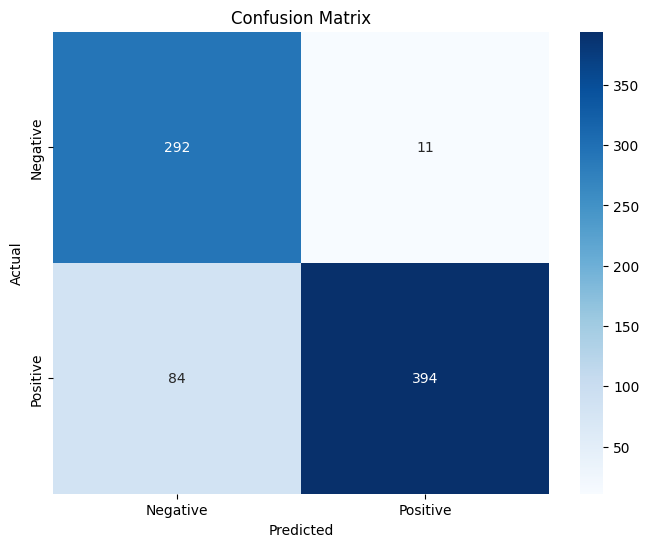

In [30]:
# MODEL 5 - FINE-TUNING ONLY LAST LAYER (MASKED IMAGES)

from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score


# Load the pretrained model from the saved path
pretrained_model_path = 'training/model5.h5'
pretrained_model = load_model(pretrained_model_path)

# Compile the model
pretrained_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the last layer on the augmented training data with early stopping
pretrained_model.layers[-1].trainable = True  # Make only the last layer trainable
pretrained_model.fit(
    train_datagen.flow(train_masked_images, train_masked_labels, batch_size=batch_size),
    steps_per_epoch=len(train_masked_images) // batch_size,
    epochs=10,
    validation_data=(val_masked_images, val_masked_labels),
    callbacks=[early_stopping]  # Add the early stopping callback
)

# Evaluate the model on the validation data
val_masked_predictions = pretrained_model.predict(val_masked_images)
val_masked_predicted_labels = (val_masked_predictions > 0.5).astype(int)  # Convert probabilities to binary labels
val_masked_accuracy = accuracy_score(val_masked_labels, val_masked_predicted_labels)
print("Validation Masked Accuracy:", val_masked_accuracy)

# Calculate the confusion matrix
confusion = confusion_matrix(val_masked_labels, val_masked_predicted_labels)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Epoch 1/10
219/219 [==============================] - 129s 228ms/step - loss: 0.5420 - accuracy: 0.7564 - val_loss: 0.5652 - val_accuracy: 0.7977
Epoch 2/10
219/219 [==============================] - 49s 223ms/step - loss: 0.3314 - accuracy: 0.8603 - val_loss: 2.1208 - val_accuracy: 0.6581
Epoch 3/10
219/219 [==============================] - 267s 1s/step - loss: 0.2451 - accuracy: 0.9059 - val_loss: 0.2884 - val_accuracy: 0.8784
Epoch 4/10
219/219 [==============================] - 47s 213ms/step - loss: 0.2037 - accuracy: 0.9213 - val_loss: 0.2712 - val_accuracy: 0.9052
Epoch 5/10
219/219 [==============================] - 48s 217ms/step - loss: 0.1735 - accuracy: 0.9336 - val_loss: 1.9923 - val_accuracy: 0.7260
Epoch 6/10
219/219 [==============================] - 47s 213ms/step - loss: 0.1499 - accuracy: 0.9464 - val_loss: 0.5222 - val_accuracy: 0.8259
Epoch 7/10
25/25 [==============================] - 3s 34ms/step
Validation Masked Accuracy: 0.9052496798975672


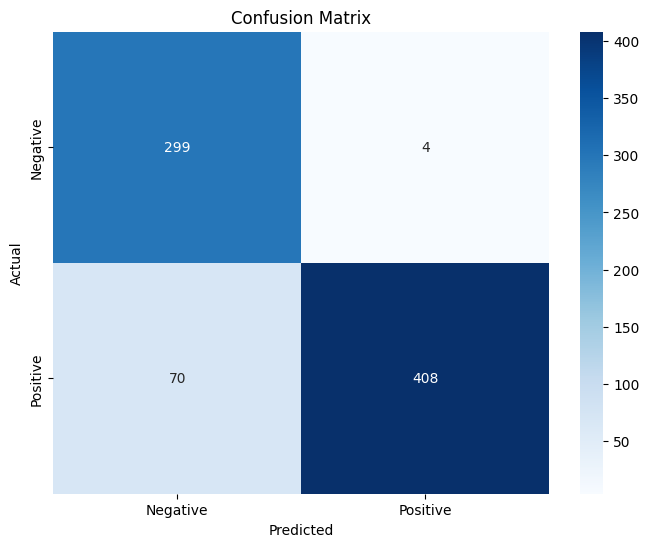

In [31]:
# MODEL 5 - FINE-TUNING ALL LAYERS (MASKED IMAGES)

from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the pretrained model from the saved path
pretrained_model_path = 'training/model5.h5'
pretrained_model = load_model(pretrained_model_path)

# Compile the model
pretrained_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train all layers on the augmented training data with early stopping
pretrained_model.trainable = True  # Make all layers trainable
pretrained_model.fit(
    train_datagen.flow(train_masked_images, train_masked_labels, batch_size=batch_size),
    steps_per_epoch=len(train_masked_images) // batch_size,
    epochs=10,
    validation_data=(val_masked_images, val_masked_labels),
    callbacks=[early_stopping]  # Add the early stopping callback
)

# Evaluate the model on the validation data
val_masked_predictions = pretrained_model.predict(val_masked_images)
val_masked_predicted_labels = (val_masked_predictions > 0.5).astype(int)  # Convert probabilities to binary labels
val_masked_accuracy = accuracy_score(val_masked_labels, val_masked_predicted_labels)
print("Validation Masked Accuracy:", val_masked_accuracy)

# Calculate the confusion matrix
confusion = confusion_matrix(val_masked_labels, val_masked_predicted_labels)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


**PART 2 - UNMASKED IMAGES**

In [4]:
# CREATE TRAINING AND VALIDATION SETS FOR UNMASKED IMAGES

import os
import json
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tqdm import tqdm
from PIL import Image

# Path to the FER_masked_Unmasked dataset
dataset_root = '/content/drive/MyDrive/FER_masked_Unmasked'

# Define target directory for preprocessed images
preprocessed_dir = '/content/drive/MyDrive/Preprocessed_Unmasked_Images'

image_size = (128, 128)
emotion_labels = ['positive', 'negative']

# Initialize lists to store data and labels for training and validation
train_unmasked_images = []
train_unmasked_labels = []
val_unmasked_images = []
val_unmasked_labels = []

# Loop through masked subfolders
for subfolder in os.listdir(os.path.join(dataset_root, 'AFEW-VA_unmasked')):
    subfolder_path = os.path.join(dataset_root, 'AFEW-VA_unmasked', subfolder)
    for image_folder in tqdm(os.listdir(subfolder_path), desc=f"Processing {subfolder}"):
        image_folder_path = os.path.join(subfolder_path, image_folder)
        json_path = os.path.join(image_folder_path, f"{image_folder}.json")

        # Load arousal and valence values from JSON
        with open(json_path, 'r') as json_file:
            label_data = json.load(json_file)
            json_part = list(list(label_data.values())[1].items())

            for k, i in json_part:
                image_name = k
                arousal = list(i.values())[0]
                valence = list(i.values())[2]

                # Determine emotion label based on valence
                if valence > 0:
                    emotion_label = 'positive'
                else:
                    emotion_label = 'negative'

                # Load and preprocess image
                image_path = os.path.join(image_folder_path, image_name + '.png')

                try:
                    image = load_img(image_path, target_size=image_size)
                    image_array = img_to_array(image) / 255.0  # Normalize pixel values to [0, 1]
                except FileNotFoundError:
                    # Skip this image if it's not found
                    continue


                # Determine if it's a training or validation image
                if 'train' in image_name:
                  train_unmasked_images.append(image_array)
                  train_unmasked_labels.append(emotion_labels.index(emotion_label))
                elif 'val' in image_name:
                  val_unmasked_images.append(image_array)
                  val_unmasked_labels.append(emotion_labels.index(emotion_label))

print("Preprocessing and saving complete.")


Processing 09: 100%|██████████| 45/45 [02:55<00:00,  3.89s/it]

Preprocessing and saving complete.


In [5]:
# AUGMENT TRAINING SET

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Convert lists to numpy arrays
train_unmasked_images = np.array(train_unmasked_images)
train_unmasked_labels = np.array(train_unmasked_labels)
val_unmasked_images = np.array(val_unmasked_images)
val_unmasked_labels = np.array(val_unmasked_labels)

# Create an ImageDataGenerator for data augmentation on the training set
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Data augmentation for validation images (only rescaling)
val_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Prepare the generators for training and validation
batch_size = 32

train_generator = train_datagen.flow(
    train_unmasked_images, train_unmasked_labels,
    batch_size=batch_size, shuffle=True
)

validation_generator = val_datagen.flow(
    val_unmasked_images, val_unmasked_labels,
    batch_size=batch_size, shuffle=False
)


In [6]:
# Print class distribution of validation data
print("Validation Class Distribution:")
print("Negative:", np.sum(val_unmasked_labels == 0))
print("Positive:", np.sum(val_unmasked_labels == 1))

Validation Class Distribution:
Negative: 159
Positive: 472


Epoch 1/10
176/176 [==============================] - 211s 1s/step - loss: 0.7675 - accuracy: 0.7137 - val_loss: 0.5153 - val_accuracy: 0.7480
Epoch 2/10
176/176 [==============================] - 204s 1s/step - loss: 0.5504 - accuracy: 0.7458 - val_loss: 0.5049 - val_accuracy: 0.7448
Epoch 3/10
176/176 [==============================] - 202s 1s/step - loss: 0.5264 - accuracy: 0.7528 - val_loss: 0.4509 - val_accuracy: 0.7861
Epoch 4/10
176/176 [==============================] - 203s 1s/step - loss: 0.5045 - accuracy: 0.7579 - val_loss: 0.4989 - val_accuracy: 0.7496
Epoch 5/10
176/176 [==============================] - 205s 1s/step - loss: 0.4981 - accuracy: 0.7611 - val_loss: 0.4769 - val_accuracy: 0.7528
Epoch 6/10
176/176 [==============================] - 206s 1s/step - loss: 0.4739 - accuracy: 0.7696 - val_loss: 0.4303 - val_accuracy: 0.7971
Epoch 7/10
176/176 [==============================] - 203s 1s/step - loss: 0.4554 - accuracy: 0.7840 - val_loss: 0.5582 - val_accuracy: 0.7908

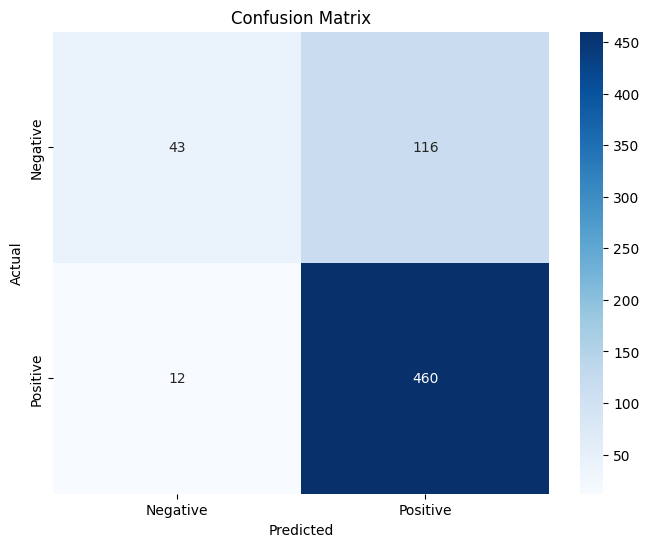

In [18]:
# MODEL 2 - UNMASKED IMAGES

from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score


# Load the pretrained model from the saved path
pretrained_model_path = 'training/model2.h5'
pretrained_model = load_model(pretrained_model_path)

# Compile the model
pretrained_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train with early stopping
pretrained_model.fit(
    train_datagen.flow(train_unmasked_images, train_unmasked_labels, batch_size=batch_size),
    steps_per_epoch=len(train_unmasked_images) // batch_size,
    epochs=10,
    validation_data=(val_unmasked_images, val_unmasked_labels),
    callbacks=[early_stopping]  # Add the early stopping callback
)

# Evaluate the model on the validation data
val_unmasked_predictions = pretrained_model.predict(val_unmasked_images)
val_unmasked_predicted_labels = (val_unmasked_predictions > 0.5).astype(int)  # Convert probabilities to binary labels
val_unmasked_accuracy = accuracy_score(val_unmasked_labels, val_unmasked_predicted_labels)
print("Validation Masked Accuracy:", val_unmasked_accuracy)

# Calculate the confusion matrix
confusion = confusion_matrix(val_unmasked_labels, val_unmasked_predicted_labels)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Epoch 1/10
176/176 [==============================] - 931s 5s/step - loss: 0.4463 - accuracy: 0.8215 - val_loss: 4.9923 - val_accuracy: 0.7480
Epoch 2/10
176/176 [==============================] - 901s 5s/step - loss: 0.2438 - accuracy: 0.9074 - val_loss: 0.2480 - val_accuracy: 0.8891
Epoch 3/10
176/176 [==============================] - 899s 5s/step - loss: 0.1904 - accuracy: 0.9293 - val_loss: 0.1369 - val_accuracy: 0.9588
Epoch 4/10
176/176 [==============================] - 895s 5s/step - loss: 0.1536 - accuracy: 0.9461 - val_loss: 1.4259 - val_accuracy: 0.7290
Epoch 5/10
176/176 [==============================] - 894s 5s/step - loss: 0.1266 - accuracy: 0.9563 - val_loss: 0.3026 - val_accuracy: 0.9239
Epoch 6/10
20/20 [==============================] - 22s 1s/step
Validation Masked Accuracy: 0.9587955625990491


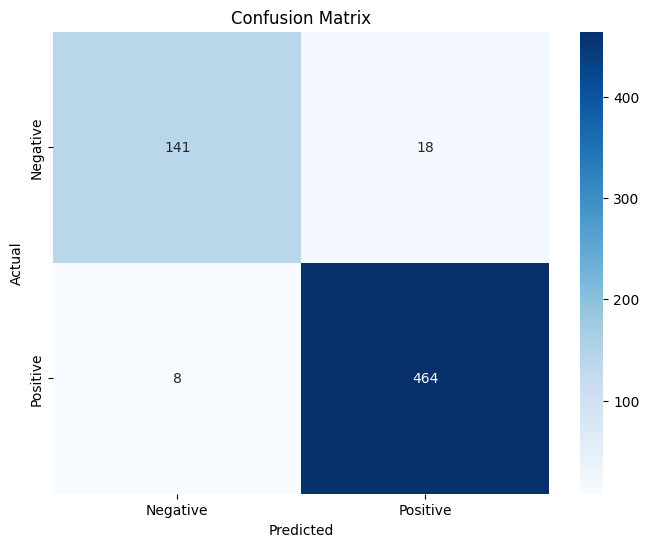

In [19]:
# MODEL 5 - FINE-TUNING ONLY LAST LAYER (UNMASKED IMAGES)

from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score


# Load the pretrained model from the saved path
pretrained_model_path = 'training/model5.h5'
pretrained_model = load_model(pretrained_model_path)

# Compile the model
pretrained_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the last layer on the augmented training data with early stopping
pretrained_model.layers[-1].trainable = True  # Make only the last layer trainable
pretrained_model.fit(
    train_datagen.flow(train_unmasked_images, train_unmasked_labels, batch_size=batch_size),
    steps_per_epoch=len(train_unmasked_images) // batch_size,
    epochs=10,
    validation_data=(val_unmasked_images, val_unmasked_labels),
    callbacks=[early_stopping]  # Add the early stopping callback
)

# Evaluate the model on the validation data
val_unmasked_predictions = pretrained_model.predict(val_unmasked_images)
val_unmasked_predicted_labels = (val_unmasked_predictions > 0.5).astype(int)  # Convert probabilities to binary labels
val_unmasked_accuracy = accuracy_score(val_unmasked_labels, val_unmasked_predicted_labels)
print("Validation Masked Accuracy:", val_unmasked_accuracy)

# Calculate the confusion matrix
confusion = confusion_matrix(val_unmasked_labels, val_unmasked_predicted_labels)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Epoch 1/10
176/176 [==============================] - 926s 5s/step - loss: 0.5216 - accuracy: 0.7922 - val_loss: 0.7371 - val_accuracy: 0.6624
Epoch 2/10
176/176 [==============================] - 896s 5s/step - loss: 0.3060 - accuracy: 0.8829 - val_loss: 0.4072 - val_accuracy: 0.8748
Epoch 3/10
176/176 [==============================] - 899s 5s/step - loss: 0.2206 - accuracy: 0.9182 - val_loss: 0.1912 - val_accuracy: 0.9445
Epoch 4/10
176/176 [==============================] - 899s 5s/step - loss: 0.1735 - accuracy: 0.9380 - val_loss: 0.1737 - val_accuracy: 0.9350
Epoch 5/10
176/176 [==============================] - 895s 5s/step - loss: 0.1398 - accuracy: 0.9522 - val_loss: 0.1256 - val_accuracy: 0.9572
Epoch 6/10
176/176 [==============================] - 895s 5s/step - loss: 0.1362 - accuracy: 0.9481 - val_loss: 0.2882 - val_accuracy: 0.9509
Epoch 7/10
176/176 [==============================] - 897s 5s/step - loss: 0.1060 - accuracy: 0.9602 - val_loss: 0.2506 - val_accuracy: 0.9223

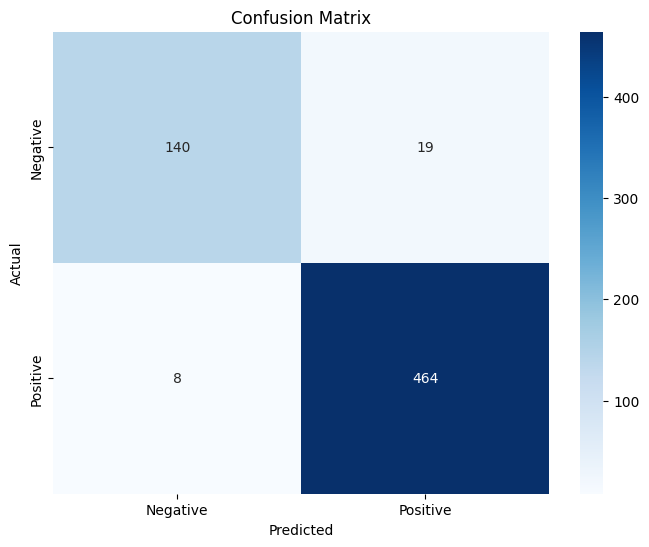

In [20]:
# MODEL 5 - FINE-TUNING ALL LAYERS (MASKED IMAGES)

from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the pretrained model from the saved path
pretrained_model_path = 'training/model5.h5'
pretrained_model = load_model(pretrained_model_path)

# Compile the model
pretrained_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train all layers on the augmented training data with early stopping
pretrained_model.trainable = True  # Make all layers trainable
pretrained_model.fit(
    train_datagen.flow(train_unmasked_images, train_unmasked_labels, batch_size=batch_size),
    steps_per_epoch=len(train_unmasked_images) // batch_size,
    epochs=10,
    validation_data=(val_unmasked_images, val_unmasked_labels),
    callbacks=[early_stopping]  # Add the early stopping callback
)

# Evaluate the model on the validation data
val_unmasked_predictions = pretrained_model.predict(val_unmasked_images)
val_unmasked_predicted_labels = (val_unmasked_predictions > 0.5).astype(int)  # Convert probabilities to binary labels
val_unmasked_accuracy = accuracy_score(val_unmasked_labels, val_unmasked_predicted_labels)
print("Validation Masked Accuracy:", val_unmasked_accuracy)

# Calculate the confusion matrix
confusion = confusion_matrix(val_unmasked_labels, val_unmasked_predicted_labels)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
